In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Using Transformer based for topic modelling. In this project, BERTOPIC is used.

In [ ]:
#need to pip install when using colab
!pip install bert
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for bert: filename=bert-2.2.0-py3-none-any.whl size=3764 sha256=da10625479e0eaf9c0296944e80c7c59a57b9a6a283a5f8994b2c7b646559259
  Stored in directory: /root/.cache/pip/wheels/65/11/40/6439aef2635f7f0137a79c4defb4c4e65dd051ec0198429e3b
  Created wheel for erlastic: filename=erlastic-2.0.0-py3-none-any.whl size=6795 sha256=13147e5422a4c38676cb49df9099a067b66f9cb7903dd594feaabbaed559b0df
  Stored in directory: /root/.cache/pip/wheels/ee/c9/a6/41a81618e939b746a3151700565d191bca832b6c345ea9b87a
Successfully built bert erlastic
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.9/103.9 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 54.4 MB/s eta 0:00:00
     ━━━━━━━━

In [ ]:
import numpy as np
import pandas as pd
from copy import deepcopy
from bertopic import BERTopic

In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/all_tickets.csv")

In [ ]:
df.head(5)

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4


In [ ]:
#To know the number number of rows of the dataset
df.shape

(48549, 9)

In [ ]:
#Check wthere there are any null values in the dataframe
print("Count Title column is null: ",df['title'].isnull().sum())
print("Count Body column is null: ",df['body'].isnull().sum())

Count Title column is null:  712
Count Body column is null:  0


In [ ]:
#Since the number of null value in the dataframe is small, those with null are dropped.
df = df.dropna()

In [ ]:
#this step is to counter check that there are no null values
print("Count Title column is null: ",df['title'].isnull().sum())
print("Count Body column is null: ",df['body'].isnull().sum())

Count Title column is null:  0
Count Body column is null:  0


In [ ]:
df.shape

(47837, 9)

In total, the dataset is still very sizable after dropping those with null values.

In [ ]:
df.head()

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4
5,mail,verification warning hi has got attached pleas...,1,4,3,7,89,3,4


In [ ]:
# Concatenate the title and description columns
df["text"] = df["title"] + " " + df["body"]

In [ ]:
df.to_csv("origin.csv")

In [ ]:
#convert concatenated "text" to list as the topic modelling has to be in a list
doc = df["text"].tolist()

In [ ]:
#to have a quick verification that these are in the list.
doc[:5]

['connection with icon icon dear please setup icon per icon engineers please let other details needed thanks lead',
 'work experience user work experience user hi work experience student coming next his name much appreciate him duration thank',
 'requesting for meeting requesting meeting hi please help follow equipments cable pc cord plug',
 'reset passwords for external accounts re expire days hi ask help update passwords colleagues thank pm expire days importance high hi received about expiration please kindly help prolongation best regards pm expire days importance high dear expire days order change please follow steps prerequisites disable device credentials close active connected by cable machine note also follow steps detailed press ctrl alt delete same pops change item enter format enter enter newly chosen then re enter again submit displaying has changed os machine browse enter format enter gear icon top tight browser window enter enter newly chosen then re enter again save con

# Instantiate the model

In [ ]:
#setting the number of topics as 32
model = BERTopic(language="english",min_topic_size = 100, nr_topics = 32)

In [ ]:
topics, probs = model.fit_transform(doc)

In [ ]:
model.get_topic_freq()

,Topic,Count
0,-1,19956
1,0,2626
2,1,1926
3,2,1720
4,3,1551
5,4,1329
6,5,1301
7,6,1252
8,7,1190
9,8,1099


The topic that are "-1" are the outliers which the transformer not able to classified them into any of the 32 topics. The topics is based on cosine similarity. 
The number of outliers looks huge (19956).
Keeping this in mind, further research need to be done to manage that so as to capitalize the whole dataset.

In [ ]:
#But first, what does topic 1 says?
model.get_topic(1)

[('card', 0.12935796593119517),
 ('visitor', 0.06085193225978933),
 ('lost', 0.05005476749747368),
 ('cards', 0.04986470232720933),
 ('access', 0.049178870435424814),
 ('la', 0.042682137976344806),
 ('area', 0.041386638453783556),
 ('si', 0.04016463612423503),
 ('floor', 0.0363632738266866),
 ('badge', 0.034908736991390556)]

In [ ]:
#visualize the topics based on the distance map.
model.visualize_topics()

In [ ]:
#The next step is to get the topics into dataframe to be extracted for the training the model for the classification case.
doc_result = model.get_document_info(doc)

In [ ]:
doc_result.head()

,Document,Topic,Name,Top_n_words,Probability,Representative_document
0,connection with icon icon dear please setup ic...,0,0_you_access_with_connection,you - access - with - connection - sent - serv...,1.000000,False
1,work experience user work experience user hi w...,12,12_user_accounts_account_users,user - accounts - account - users - create - p...,0.681635,False
2,requesting for meeting requesting meeting hi p...,3,3_meeting_phone_room_rooms,meeting - phone - room - rooms - mobile - call...,0.828295,False
3,reset passwords for external accounts re expir...,-1,-1_please_hi_regards_pm,please - hi - regards - pm - re - thank - for ...,0.000000,False
4,mail verification warning hi has got attached ...,25,25_tickets_ticket_snow_logged,tickets - ticket - snow - logged - resolved - ...,0.496737,False


In [ ]:
#Saved as a table in csv format.
doc_result.to_csv('tablelabel.csv')

In [ ]:
topic = model.get_topic_info()

In [ ]:
#getting the topic information
topic = model.get_topic_info()
topic

,Topic,Count,Name
0,-1,19956,-1_please_hi_regards_pm
1,0,2626,0_you_access_with_connection
2,1,1926,1_card_visitor_lost_cards
3,2,1720,2_starter_form_new_transfer
4,3,1551,3_meeting_phone_room_rooms
5,4,1329,4_laptop_backpack_keyboard_charger
6,5,1301,5_code_pipeline_setup_project
7,6,1252,6_confluence_access_user_please
8,7,1190,7_oracle_error_app_you
9,8,1099,8_upgrade_updates_windows_update


In [ ]:
#generating the labels to have a closer look.
model.generate_topic_labels()

['-1_please_hi_regards',
 '0_you_access_with',
 '1_card_visitor_lost',
 '2_starter_form_new',
 '3_meeting_phone_room',
 '4_laptop_backpack_keyboard',
 '5_code_pipeline_setup',
 '6_confluence_access_user',
 '7_oracle_error_app',
 '8_upgrade_updates_windows',
 '9_change_name_owner',
 '10_password_expire_reset',
 '11_approval_approve_approver',
 '12_user_accounts_account',
 '13_purchase_po_administrator',
 '14_mailbox_size_almost',
 '15_wants_decline_accept',
 '16_folder_folders_storage',
 '17_po_purchase_item',
 '18_access_to_pas',
 '19_git_repository_debug',
 '20_cards_timecard_card',
 '21_license_studio_visual',
 '22_monitor_monitors_stand',
 '23_leave_annual_days',
 '24_add_groups_mailing',
 '25_tickets_ticket_snow',
 '26_interns_starter_discipline',
 '27_outlook_issues_with',
 '28_expense_report_approval',
 '29_leaver_did_approver',
 '30_report_reports_access',
 '31_rights_permissions_permission']

# Using Classical method

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=817ef1cf19a59511699b3c2991005cc2596b9de24bfc2fc5e0a5cf839223a290
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for sklearn
  Running setup.py clean for sklearn
Successfully built pyLD

In [ ]:
# Import required packages
import numpy as np
import pandas as pd
import logging
import pyLDAvis.gensim_models
import json
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/all_tickets.csv")

In [ ]:
#drop rows where the title is null
df = df.dropna()

In [ ]:
# Concatenate the title and description columns
df["text"] = df["title"] + " " + df["body"]

In [ ]:
#convert concatenated "text" to list as the topic modelling has to be in a list
dfdoc = df["text"].tolist()

In [ ]:
dfdoc[:5]

['connection with icon icon dear please setup icon per icon engineers please let other details needed thanks lead',
 'work experience user work experience user hi work experience student coming next his name much appreciate him duration thank',
 'requesting for meeting requesting meeting hi please help follow equipments cable pc cord plug',
 'reset passwords for external accounts re expire days hi ask help update passwords colleagues thank pm expire days importance high hi received about expiration please kindly help prolongation best regards pm expire days importance high dear expire days order change please follow steps prerequisites disable device credentials close active connected by cable machine note also follow steps detailed press ctrl alt delete same pops change item enter format enter enter newly chosen then re enter again submit displaying has changed os machine browse enter format enter gear icon top tight browser window enter enter newly chosen then re enter again save con

In [ ]:
# Define function for tokenize and lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 3] for doc in docs]
    
    # Lemmatize all words in documents.
    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  
    return docs

In [ ]:
# Perform function on our document
docs = docs_preprocessor(dfdoc)

#Create Biagram & Trigram Models
from gensim.models import Phrases

# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])

In [ ]:
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
#Remove rare & common tokens 
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=10, no_above=0.2)
#Create dictionary and corpus required for Topic Modeling
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print(corpus[:1])

Number of unique tokens: 7432
Number of documents: 47837
[[(0, 1), (1, 1), (2, 1), (3, 4), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]]


In [ ]:
# Set parameters.
num_topics = 5
chunksize = 500 
passes = 20 
iterations = 400
eval_every = 1  

# Make a index to word dictionary.
temp = dictionary[0]  # only to "load" the dictionary.
id2word = dictionary.id2token

lda_model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)
# Print the Keyword in the 5 topics
print(lda_model.print_topics())

[(0, '0.040*"following" + 0.027*"report" + 0.025*"data" + 0.024*"line_manager" + 0.018*"line" + 0.017*"manager" + 0.016*"kind_regard" + 0.015*"send" + 0.015*"start" + 0.014*"action"'), (1, '0.051*"with" + 0.050*"have" + 0.035*"error" + 0.030*"issue" + 0.019*"when" + 0.017*"annual_leave" + 0.017*"problem" + 0.015*"there" + 0.014*"card" + 0.013*"your"'), (2, '0.048*"sent" + 0.022*"kind_regard" + 0.019*"access" + 0.018*"best_regard" + 0.013*"could" + 0.012*"issue" + 0.011*"importance_high" + 0.010*"monday" + 0.009*"below" + 0.009*"manager"'), (3, '0.030*"contact" + 0.027*"password" + 0.018*"your" + 0.013*"another" + 0.012*"reset_password" + 0.012*"high_priority" + 0.012*"reset" + 0.012*"information" + 0.011*"already" + 0.010*"floor"'), (4, '0.044*"expense_report" + 0.030*"into" + 0.028*"connection" + 0.025*"expense" + 0.022*"phone" + 0.016*"number" + 0.015*"raise" + 0.015*"report" + 0.012*"cable" + 0.012*"registered"')]


In [ ]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.41075065631126984


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, 
                                                        corpus=corpus, 
                                                        texts=docs, 
                                                        start=2, 
                                                        limit=40, 
                                                        step=6)

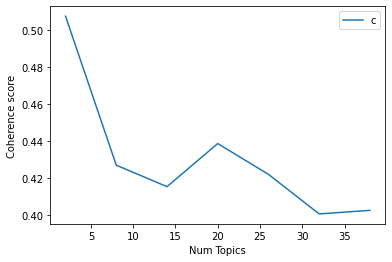

In [ ]:
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Testing Other Optimal Topics


## topics = 32

In [ ]:
model = BERTopic(language="english",min_topic_size = 100, nr_topics = 32)

In [ ]:
#convert concatenated "text" to list as the topic modelling has to be in a list
doc = df["text"].tolist()

In [ ]:
doc[:5]

['connection with icon icon dear please setup icon per icon engineers please let other details needed thanks lead',
 'work experience user work experience user hi work experience student coming next his name much appreciate him duration thank',
 'requesting for meeting requesting meeting hi please help follow equipments cable pc cord plug',
 'reset passwords for external accounts re expire days hi ask help update passwords colleagues thank pm expire days importance high hi received about expiration please kindly help prolongation best regards pm expire days importance high dear expire days order change please follow steps prerequisites disable device credentials close active connected by cable machine note also follow steps detailed press ctrl alt delete same pops change item enter format enter enter newly chosen then re enter again submit displaying has changed os machine browse enter format enter gear icon top tight browser window enter enter newly chosen then re enter again save con

In [ ]:
topics, probs = model.fit_transform(doc)

In [ ]:
model.get_topic_freq()

,Topic,Count
0,-1,21513
1,0,2523
2,1,2146
3,2,1257
4,3,1224
5,4,1215
6,5,1214
7,6,1113
8,7,1041
9,8,1003


In [ ]:
model.get_topic(1)

[('access', 0.03692822025112422),
 ('connection', 0.03356812222605322),
 ('you', 0.03280835907885445),
 ('connect', 0.029900098009790613),
 ('can', 0.027123072088188965),
 ('with', 0.0264589202660494),
 ('sent', 0.025495584413738295),
 ('error', 0.023797373975476606),
 ('certificate', 0.023057087044931993),
 ('have', 0.0218473645408064)]

In [ ]:
model.visualize_topics()

In [ ]:
doc_result = model.get_document_info(doc)

In [ ]:
topic = model.get_topic_info()

In [ ]:
topic

,Topic,Count,Name
0,-1,21513,-1_please_hi_pm_regards
1,0,2523,0_starter_form_new_attached
2,1,2146,1_access_connection_you_connect
3,2,1257,2_confluence_access_user_please
4,3,1224,3_access_area_secure_to
5,4,1215,4_code_pipeline_setup_codes
6,5,1214,5_laptop_backpack_keyboard_charger
7,6,1113,6_error_oracle_submit_you
8,7,1041,7_upgrade_updates_windows_update
9,8,1003,8_card_visitor_la_si


## topics = 8

In [ ]:
model = BERTopic(language="english",min_topic_size = 100, nr_topics = 8)

In [ ]:
#convert concatenated "text" to list as the topic modelling has to be in a list
doc = df["text"].tolist()

In [ ]:
doc[:5]

['connection with icon icon dear please setup icon per icon engineers please let other details needed thanks lead',
 'work experience user work experience user hi work experience student coming next his name much appreciate him duration thank',
 'requesting for meeting requesting meeting hi please help follow equipments cable pc cord plug',
 'reset passwords for external accounts re expire days hi ask help update passwords colleagues thank pm expire days importance high hi received about expiration please kindly help prolongation best regards pm expire days importance high dear expire days order change please follow steps prerequisites disable device credentials close active connected by cable machine note also follow steps detailed press ctrl alt delete same pops change item enter format enter enter newly chosen then re enter again submit displaying has changed os machine browse enter format enter gear icon top tight browser window enter enter newly chosen then re enter again save con

In [ ]:
topics, probs = model.fit_transform(doc)

In [ ]:
model.get_topic_freq()

,Topic,Count
0,-1,33369
1,0,3320
2,1,2550
3,2,1708
4,3,1537
5,4,1436
6,5,1378
7,6,1284
8,7,1255


In [ ]:
model.get_topic(1)

[('starter', 0.17413560457367278),
 ('form', 0.1278291345233817),
 ('new', 0.07653467108602587),
 ('please', 0.0707066624032412),
 ('pm', 0.06131217282316385),
 ('thank', 0.05739818930355631),
 ('attached', 0.05715645735896805),
 ('hello', 0.05255678660504043),
 ('re', 0.05061680598109311),
 ('fill', 0.04574527942415074)]

In [ ]:
model.visualize_topics()

By using 8 topics, there are only two distinct clusters. This might not be the optimal to use.

In [ ]:
doc_result = model.get_document_info(doc)

In [ ]:
df.head()

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact,text
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4,connection with icon icon dear please setup ic...
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4,work experience user work experience user hi w...
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4,requesting for meeting requesting meeting hi p...
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4,reset passwords for external accounts re expir...
5,mail,verification warning hi has got attached pleas...,1,4,3,7,89,3,4,mail verification warning hi has got attached ...


#topics = 5

In [ ]:
model = BERTopic(language="english",min_topic_size = 100, nr_topics = 5)

In [ ]:
#convert concatenated "text" to list as the topic modelling has to be in a list
doc = df_1["text"].tolist()

In [ ]:
topics, probs = model.fit_transform(doc)

In [ ]:
model.visualize_topics()

It looks better as there are very 5 distinct clusters. 

In [ ]:
doc_result = model.get_document_info(doc)

In [ ]:
topic = model.get_topic_info()

In [ ]:
topic

,Topic,Count,Name
0,-1,5304,-1_please_regards_pm_hi
1,0,1126,0_laptop_backpack_keyboard_charger
2,1,928,1_purchase_po_please_administrator
3,2,900,2_upgrade_you_update_updates
4,3,671,3_po_purchase_please_item
5,4,563,4_monitor_please_thank_pm


The number of outliers reduced by using 5 topics.

# Using seed topics
As in the previous experiment on the number of topics, when the topics set to 5, we are able to reduce the outliers to approximately 5000. 
The below experiment is to find out if there are any possibilties to get the transformer to get every data points into a topic.

reduc_outliers can be used for the this purposes.

In [ ]:
#Using seed topics requires domain knowledge. These are the probable "words" for the IT support tickets
seed_topic_list = [["hardware", "software", "network", "systems", "card"],
    ["creating", "managing", "resolving", "issues", "user accounts", "user", "account", "password"],
    ["email", "instant", "message", "communicate"],
    ["printers", "scanners", "peripherals", "monitor", "hardware"],
    ["smartphones", "tablets", "mobile", "device", "purchase", "PO", "purchase order"],
    ["security", "privacy", "data", "protection"],
    ["install", "upgrad", "configure", "software", "upgrade", "purchase"],
    ["cloud", "service", "application"],
    ["managing", "maintaining", "resolve", "problem", "database", "storage"],
    ["back up", "recover", "data", "recovery"]]

In [ ]:
#instantiate the model
model = BERTopic(seed_topic_list=seed_topic_list, language="english", min_topic_size = 100, nr_topics = 32)

In [ ]:
topics, probs = model.fit_transform(doc)

In [ ]:
#reduc_outliers is used to get the new topics
new_topics = model.reduce_outliers(doc, topics, strategy="c-tf-idf")

In [ ]:
model.update_topics(doc, topics=new_topics)

In [ ]:
model.get_topic_info()

,Topic,Count,Name
0,0,5474,0_you_sent_with_for
1,1,2423,1_starter_form_new_date
2,2,1530,2_password_expire_reset_change
3,3,1717,3_laptop_keyboard_backpack_charger
4,4,1312,4_confluence_access_user_pm
5,5,2943,5_access_to_area_floor
6,6,1107,6_card_visitor_lost_cards
7,7,1722,7_approval_approve_approved_contract
8,8,1460,8_purchase_po_administrator_installation
9,9,1911,9_change_name_owner_please


It looks like this method works. Those outliers are eradicated.

In [ ]:
model.visualize_topics()

In [ ]:
doc_result = model.get_document_info(doc)

In [ ]:
doc_result.head()

,Document,Topic,Name,Top_n_words,Probability,Representative_document
0,connection with icon icon dear please setup ic...,0,0_you_sent_with_for,you - sent - with - for - we - have - can - ac...,1.000000,False
1,work experience user work experience user hi w...,21,21_user_accounts_users_create,user - accounts - users - create - account - a...,0.715048,False
2,requesting for meeting requesting meeting hi p...,31,31_meeting_room_rooms_floor,meeting - room - rooms - floor - video - booki...,0.000000,False
3,reset passwords for external accounts re expir...,2,2_password_expire_reset_change,password - expire - reset - change - days - lo...,0.869528,False
4,mail verification warning hi has got attached ...,28,28_ticket_tickets_assigned_for,ticket - tickets - assigned - for - logged - p...,0.415302,False


In [ ]:
#saving the processed labelled topics into a dataframe
doc_result.to_csv("updated_processed.csv")

In [ ]:
topic_distr, _ = model.approximate_distribution(doc)

In [ ]:
model.visualize_distribution(topic_distr[0])

In [ ]:
# Calculate the topic distributions on a token-level
topic_distr, topic_token_distr = model.approximate_distribution(doc, calculate_tokens=True)



In [ ]:
topic_distr.shape

(47837, 31)

In [ ]:
# Visualize the token-level distributions
df_result = model.visualize_approximate_distribution(doc[0], topic_token_distr[0])
df_result

,connection,with,icon,icon,dear,please,setup,icon,per,icon,engineers,please,let,other,details,needed,thanks,lead
5_access_to_area_floor,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.102,0.220,0.220,0.220,0.118
9_change_name_owner_please,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.108,0.108,0.108,0.212,0.104,0.104,0.104
10_re_site_pm_si,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.141,0.276,0.408,0.527,0.386,0.251,0.119
15_code_codes_project_setup,0.000,0.000,0.000,0.121,0.242,0.366,0.366,0.245,0.124,0.000,0.000,0.115,0.216,0.322,0.424,0.309,0.208,0.102
16_pipeline_code_setup_opportunity,0.000,0.000,0.000,0.159,0.319,0.479,0.479,0.319,0.160,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
20_leaver_did_approver_leaving,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.105,0.105,0.105,0.105,0.000
21_user_accounts_users_create,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.120,0.231,0.346,0.451,0.332,0.220,0.105
28_ticket_tickets_assigned_for,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.107,0.107,0.107,0.107,0.000,0.000,0.000
